# Desafío Agua Potable

## Cargar bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
from pycaret.classification import *
import warnings
warnings.filterwarnings("ignore")

Leemos el archivo

In [2]:
dataset = pd.read_csv('../data/water_potability.csv')

¿Qué nos mostrarían las primeras filas?

In [3]:
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Explicación de variables:
-**pH**: (1 to 14).

-**Hardness**: Dureza mg/L.

-**Solids**: solidos disueltos en ppm.

-**Chloramines**: cloraminas en ppm.

-**Sulfate**: sulfatos disueltos en mg/L.

-**Conductivity**: conductividad electrica en μS/cm.

-**Organic_carbon**: carbón orgánico en ppm.

-**Trihalomethanes**: trihalometanos en μg/L.

-**Turbidity**:  Turbiedad en NTU.

-**Potability**: ¿Es potable el agua? 1 Sí, 0 No.

In [4]:
dataset.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [5]:
dataset.Potability.value_counts(normalize=True)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

## Relación entre variables

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

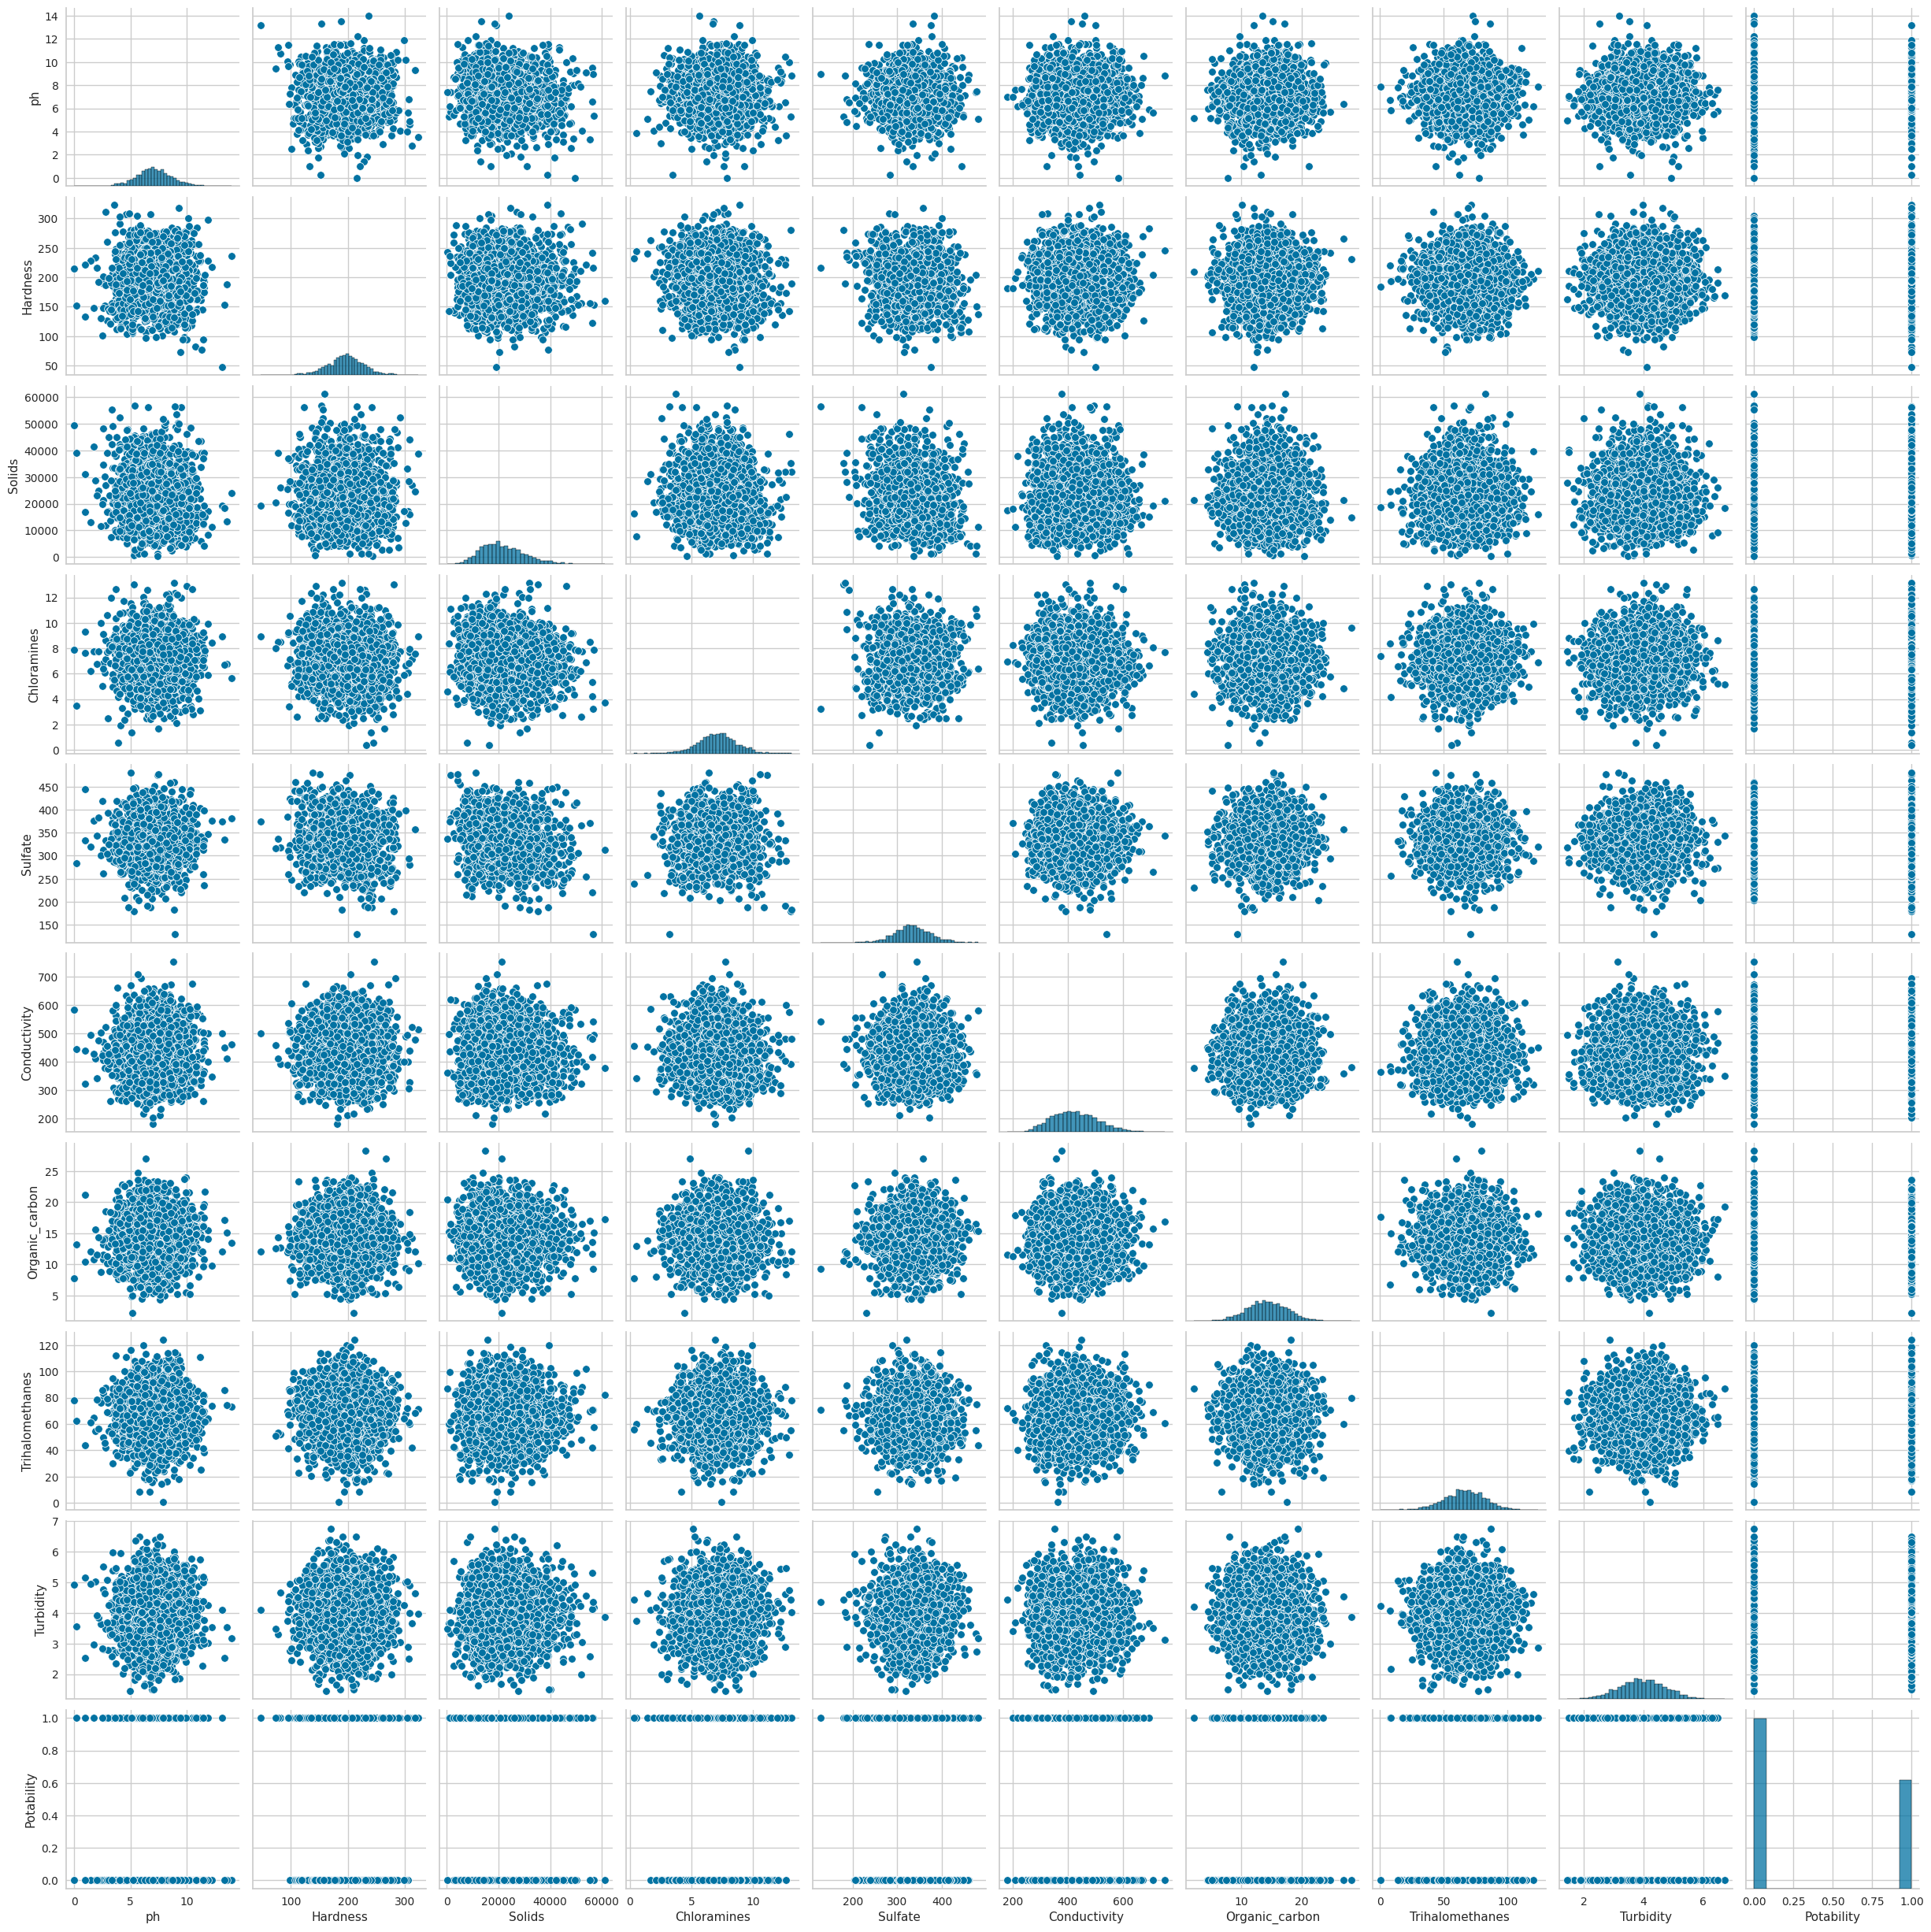

In [6]:
sns.pairplot(dataset);

## Crear experimento

In [7]:
data = dataset.sample(frac=0.8, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Casos para modelamiento: ' + str(data.shape))
print('Casos para predicción: ' + str(data_unseen.shape))

Casos para modelamiento: (2621, 10)
Casos para predicción: (655, 10)


In [8]:
exp_clf101 = setup(data = data, target = 'Potability', session_id=123)

,Description,Value
0,Session id,123
1,Target,Potability
2,Target type,Binary
3,Original data shape,"(2621, 10)"
4,Transformed data shape,"(2621, 10)"
5,Transformed train set shape,"(1834, 10)"
6,Transformed test set shape,"(787, 10)"
7,Numeric features,9
8,Rows with missing values,38.3%
9,Preprocess,True


## Comparamos modelos disponibles 

Aparentemente el modelo que tiene mayor potencial es ```modelo```

In [9]:
models_list = ['lr','dt','rf','xgboost','catboost','lightgbm']

In [10]:
my_models = exp_clf101.compare_models(include = models_list,n_select=6)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:54:12
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6570,0.6772,0.3354,0.6156,0.4311,0.2158,0.2376,2.1030
rf,Random Forest Classifier,0.6440,0.6377,0.2990,0.5863,0.3946,0.1795,0.2001,0.3740
lightgbm,Light Gradient Boosting Machine,0.6178,0.6248,0.3480,0.5180,0.4143,0.1473,0.1545,27.8380
lr,Logistic Regression,0.6096,0.5055,0.0028,0.1333,0.0054,0.0012,0.0078,0.4270
xgboost,Extreme Gradient Boosting,0.6085,0.6185,0.3828,0.4989,0.4316,0.1418,0.1451,0.1740
dt,Decision Tree Classifier,0.5731,0.5557,0.4764,0.4549,0.4643,0.1102,0.1107,0.0340


Processing:   0%|          | 0/34 [00:00<?, ?it/s]

In [12]:
cb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6576,0.6694,0.3194,0.6216,0.4220,0.2129,0.2368
1,0.6413,0.6302,0.2917,0.5833,0.3889,0.1732,0.1941
2,0.6141,0.6343,0.2361,0.5152,0.3238,0.1032,0.1186
3,0.7120,0.7321,0.3611,0.7879,0.4952,0.3306,0.3799
4,0.6612,0.6574,0.4366,0.5849,0.5000,0.2519,0.2580
5,0.6503,0.6977,0.3803,0.5745,0.4576,0.2150,0.2250
6,0.6503,0.6934,0.3662,0.5778,0.4483,0.2107,0.2224
7,0.6667,0.6730,0.2817,0.6667,0.3960,0.2151,0.2532
8,0.6667,0.7070,0.3333,0.6486,0.4404,0.2364,0.2630


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [13]:
print(cb)

In [14]:
tuned_cb = tune_model(cb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6739,0.6626,0.3333,0.6667,0.4444,0.2484,0.2783
1,0.6304,0.6081,0.3333,0.5455,0.4138,0.1663,0.1771
2,0.6250,0.6107,0.2361,0.5484,0.3301,0.1237,0.1449
3,0.6902,0.7018,0.4306,0.6596,0.5210,0.3067,0.3220
4,0.6721,0.6485,0.4507,0.6038,0.5161,0.2760,0.2828
5,0.6776,0.7084,0.4085,0.6304,0.4957,0.2743,0.2883
6,0.6721,0.7013,0.4225,0.6122,0.5000,0.2681,0.2783
7,0.6612,0.6703,0.3239,0.6216,0.4259,0.2181,0.2414
8,0.6612,0.7197,0.3333,0.6316,0.4364,0.2260,0.2495


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


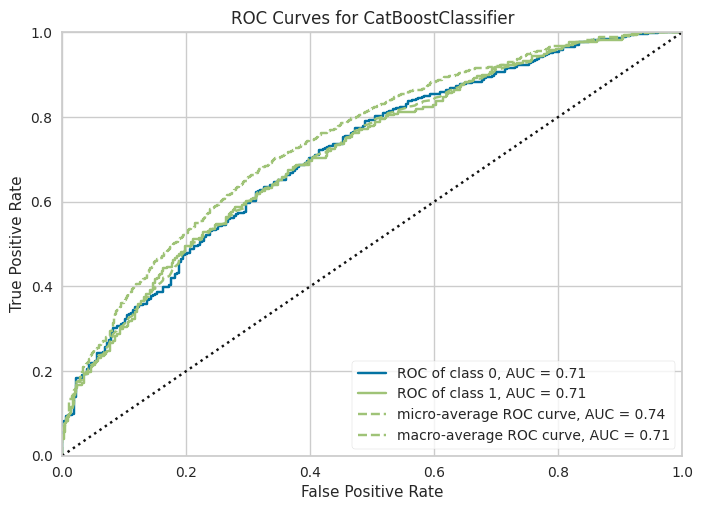

In [14]:
plot_model(tuned_cb, plot = 'auc')

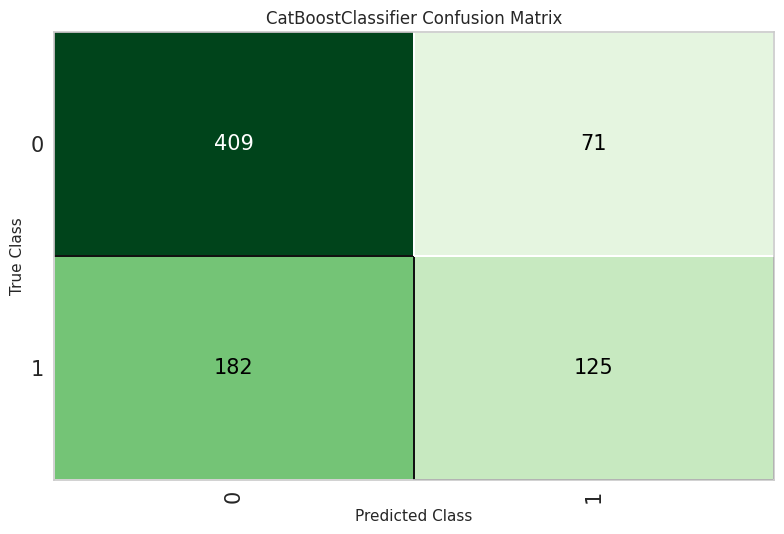

In [20]:
plot_model(tuned_cb, plot = 'confusion_matrix')

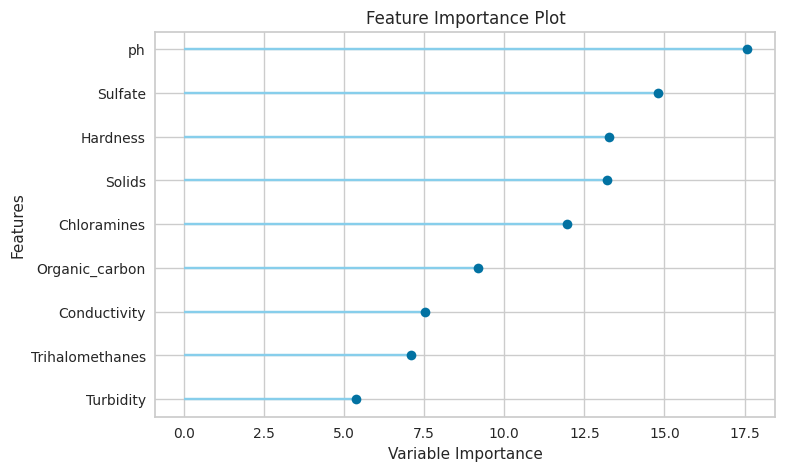

In [15]:
plot_model(tuned_cb, plot = 'feature')

In [16]:
predict_model(tuned_cb);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.6785,0.7132,0.4072,0.6378,0.4970,0.2773,0.2924


In [17]:
unseen_predictions = predict_model(tuned_cb, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7817,0.8704,0.5975,0.9268,0.7266,0.5586,0.5960


In [18]:
unseen_predictions.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,prediction_label,prediction_score
0,5.859691,163.496902,19231.033203,6.541681,339.371490,468.376953,19.749079,61.790981,2.747333,0,0,0.8315
1,8.891674,184.869614,41801.441406,3.409576,337.047119,461.076813,13.715504,42.078121,4.522599,0,0,0.6316
2,10.154219,244.209381,24755.960938,4.711350,299.797516,387.589417,15.363599,70.823242,3.730899,0,0,0.8212
3,NaN,227.432663,32102.191406,3.646847,321.671082,433.276489,11.690091,57.049690,3.581037,0,0,0.8148
4,7.683156,221.575348,25475.884766,9.914966,NaN,372.803925,12.054440,51.892502,4.781323,0,0,0.7862


In [19]:
pd.crosstab(unseen_predictions.Potability, unseen_predictions.prediction_label)

prediction_label,0,1
Potability,,
0,322,15
1,128,190
